# WHO - Life Expectancy
https://www.kaggle.com/kumarajarshi/life-expectancy-who

DEFINITIONS
<li> <b>Adult mortaility rate:</b>
The adult mortality rate refers to the probability that those who have reached age 15 will die before reaching age 60 (shown per 1,000 persons) </li>
<li> <b> Infant mortality rate:</b>
    Infant mortality is the death of young children under the age of 1. This death toll is measured by the infant mortality rate (IMR), which is the probability of deaths of children under one year of age per 1000 live births.</li>
<li> <b>Hepatitis B:</b>
    Hepatitis B is a viral infection that attacks the liver and can cause both acute and chronic disease.</li>
<li> <b>Measles :</b>
    Measles is a highly contagious illness caused by a virus that replicates in the nose and throat of an infected child or adult.</li>
<li><b>BMI:</b>
Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women.</li>
<li> <b>Diphtheria: </b> Diphtheria (dif-THEER-e-uh) is a serious bacterial infection that usually affects the mucous membranes of your nose and throat. </li>
<li><b> Polio:</b> Polio, or poliomyelitis, is a disabling and life-threatening disease caused by the poliovirus. The virus spreads from person to person and can infect a person's spinal cord, causing paralysis (can't move parts of the body).<\li>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import pickle

# %matplotlib inline

### Hypothesis 
<br>
<li>Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?</li>
<li>Should a country having a lower life expectancy value(less than 65) increase its healthcare expenditure in order to improve its average lifespan?</li>
<li>How does Infant and Adult mortality rates affect life expectancy?</li>
<li>Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.</li>
<li>What is the impact of schooling on the lifespan of humans?</li>
<li>Does Life Expectancy have positive or negative relationship with drinking alcohol?</li>
<li>Do densely populated countries tend to have lower life expectancy?</li>
<li>What is the impact of Immunization coverage on life Expectancy?</li>

In [20]:
df = pd.read_csv('./data/Life Expectancy Data.csv')

# Get numerical and categorical columns
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
tar_col = 'Life expectancy'

# Remove empty spaces in leading and trail
col_names = [col_name.strip() for col_name in df.columns]
df.columns = col_names

In [21]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [22]:
df.iloc[:,10:].head()

,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [23]:
(df.isnull().sum().sort_values()/df.shape[0]) * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
infant deaths                       0.000000
percentage expenditure              0.000000
Measles                             0.000000
HIV/AIDS                            0.000000
under-five deaths                   0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
Polio                               0.646698
Diphtheria                          0.646698
thinness 5-9 years                  1.157250
thinness  1-19 years                1.157250
BMI                                 1.157250
Schooling                           5.547992
Income composition of resources     5.684139
Alcohol                             6.603131
Total expenditure                   7.692308
GDP                                15.248468
Hepatitis B                        18.822328
Population                         22.191967
dtype: flo

In [24]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [27]:
df.to_csv('./data/Processed.csv', index=False)

### Data pre-processing

Each country should have records from 2000 - 2015 (16 observations) and will eliminate countries that are having very less observations

In [25]:
# Get each country's number of records
df = df.join(df.groupby(['Country']).agg({'Year': 'count'}), 
             on='Country', 
             rsuffix='_count')

# If the countries are having less than 16 observations eliminate it
df = df[~(df['Year_count'] < 16)]

# Drop temp column
df.drop(['Year_count'], axis=1, inplace=True)

### Missing value treatment

<li> Drop "population" column as 41/183 countries are having null values </li>
<li> Drop 'Hepatitis B' column as atleast 9/183 countries are completely not having values or experiment it to improve accuracy </li>
<li> Drop 'GDP' column as atleast 24/183 countries are completely not having values and also it is having strong co-relation with percentage of expenditure</li>

In [17]:
df.drop(['Population', 'Hepatitis B', 'GDP'], axis=1, inplace=True)
df.dropna(inplace=True)

In [18]:
(df.isnull().sum().sort_values()/df.shape[0]) * 100

Country                            0.0
thinness 5-9 years                 0.0
thinness  1-19 years               0.0
HIV/AIDS                           0.0
Diphtheria                         0.0
Total expenditure                  0.0
Polio                              0.0
under-five deaths                  0.0
Income composition of resources    0.0
BMI                                0.0
percentage expenditure             0.0
Alcohol                            0.0
infant deaths                      0.0
Adult Mortality                    0.0
Life expectancy                    0.0
Status                             0.0
Year                               0.0
Measles                            0.0
Schooling                          0.0
dtype: float64

### Univariate analysis

<b>Categorical analysis</b>

Developing    0.829812
Developed     0.170188
Name: Status, dtype: float64


<AxesSubplot:xlabel='Status', ylabel='count'>

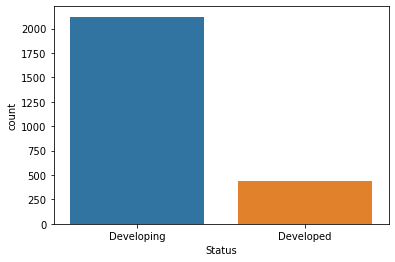

In [86]:
print(df['Status'].value_counts(normalize=True))
sns.countplot(x='Status', data=df)

In [87]:
(df['Country'].value_counts(normalize=True) * 100).max()

0.6259780907668232

In [88]:
# Drop country column from the dataset
df.drop(['Country', 'Year'], axis=1, inplace=True)

<li>Majority of the sample are from the developing countries(83%) rather than developed countries(17%)</li>

<li>Drop the column country because at max only 0.6% contribution is given by a country to the dataset<br></li>
<li>Also, drop column year as it may not produce useful information. Will bring back this column if model accuracy can improve</li>

<B> Numerical analysis </b>

In [89]:
# Update numerical columns as we dropped couple of columns in the categorical analysis
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
tar_col = 'Life expectancy'

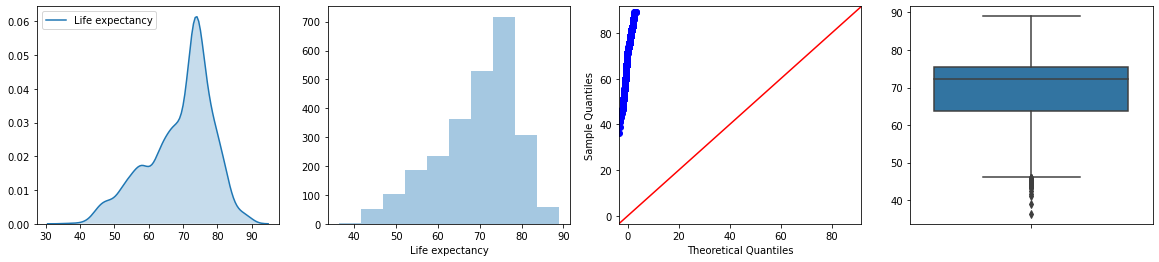

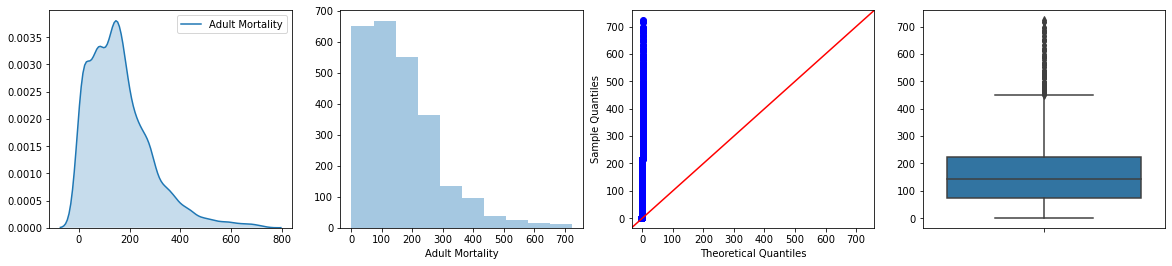

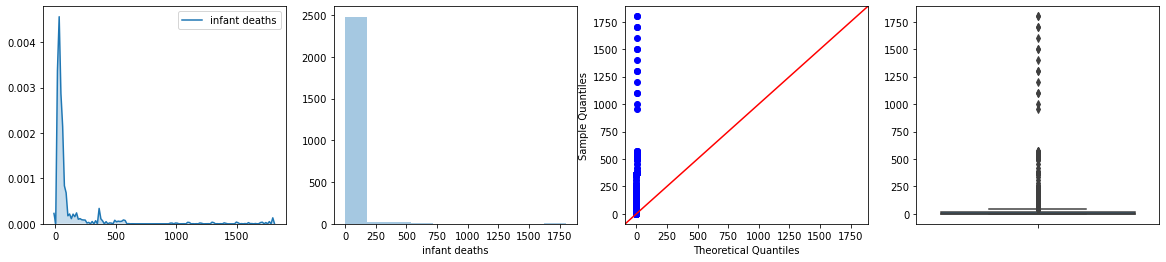

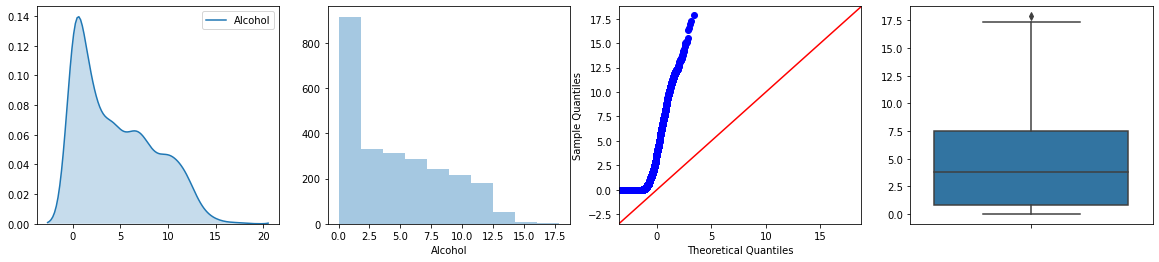

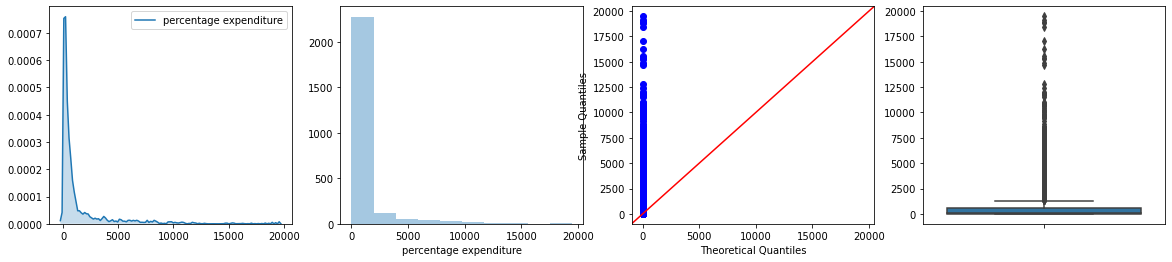

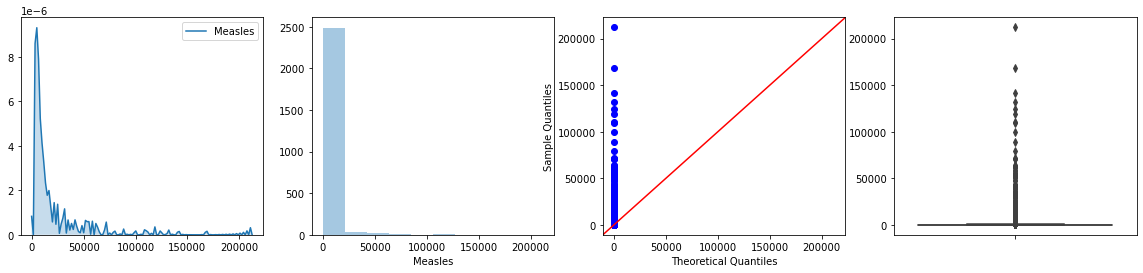

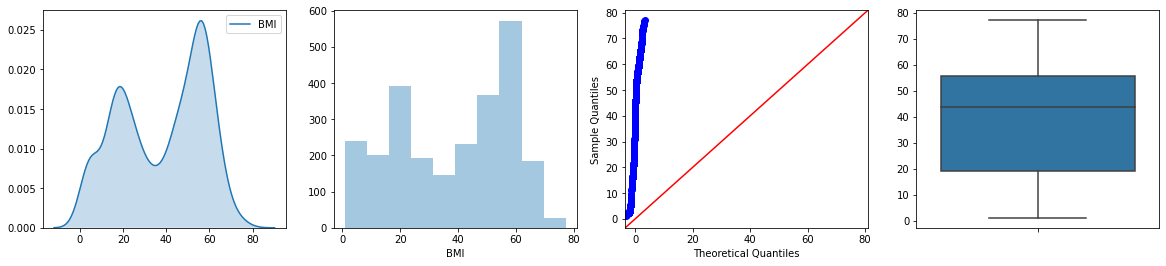

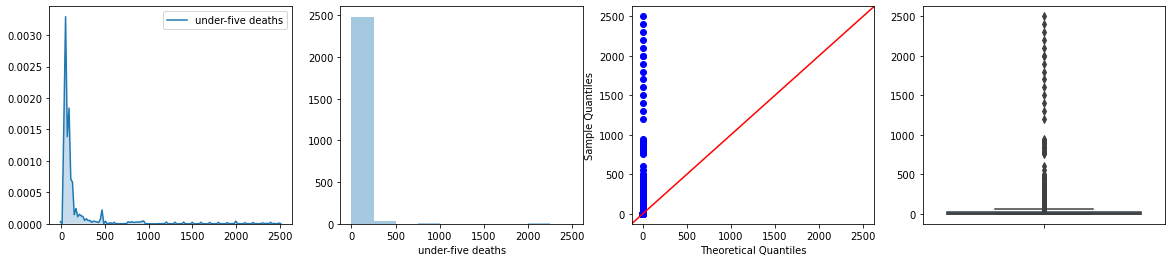

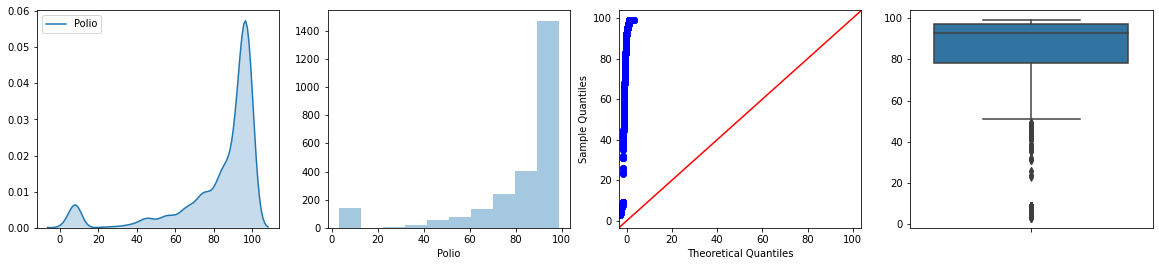

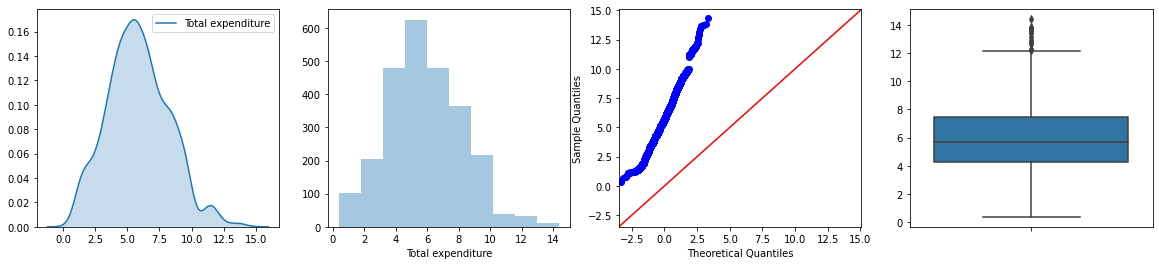

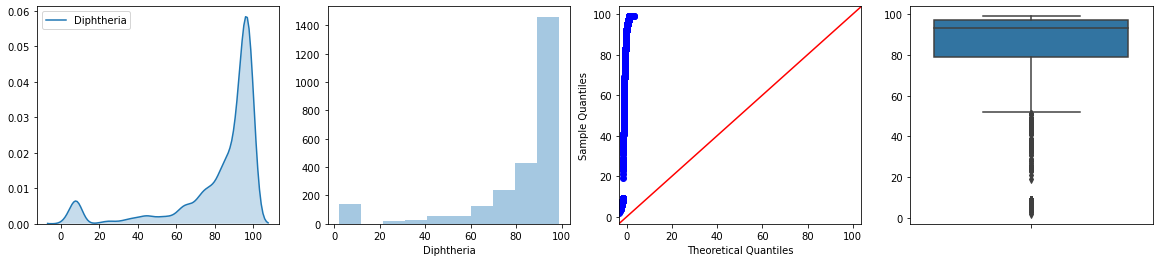

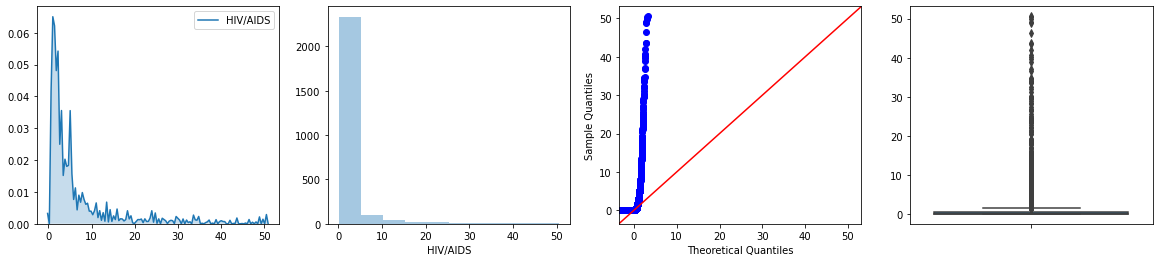

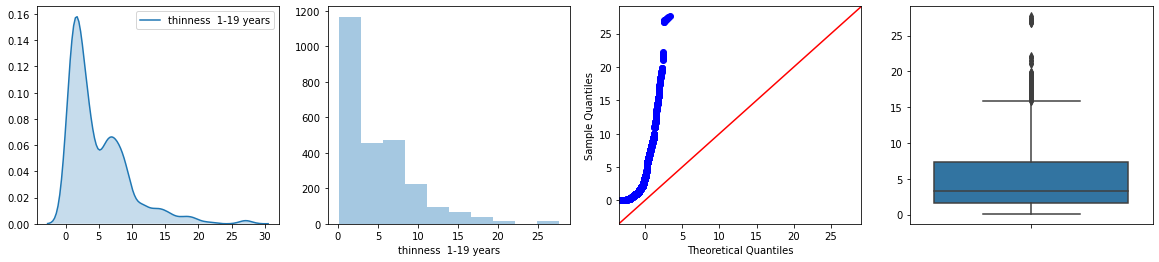

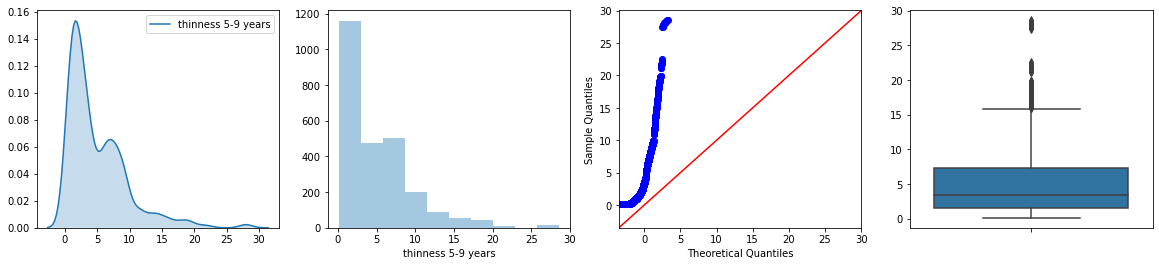

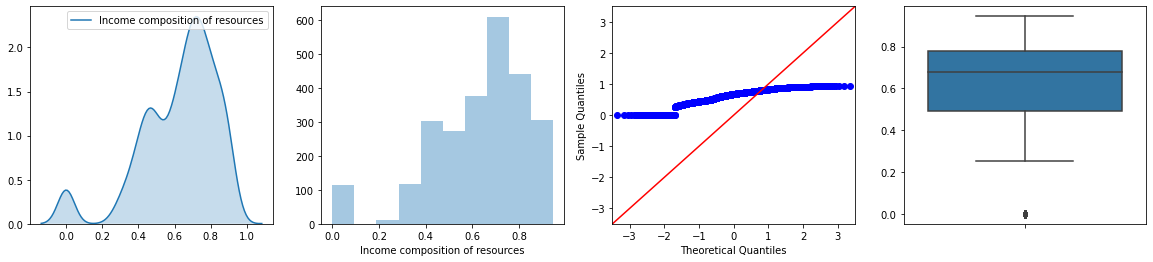

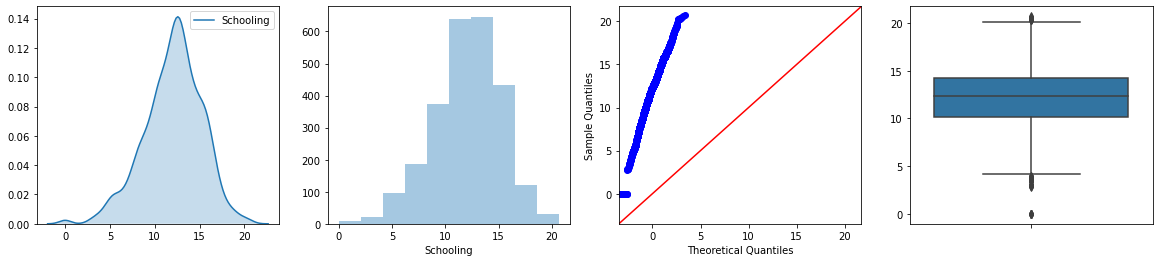

In [90]:
# Plot charts for all columns
for cols in num_cols:
    # Init subplots
    fig, ax = plt.subplots(1, 4, figsize=(20, 4))
    
    # Plots of distribution, histogram, normality test, box plot
    sns.kdeplot(data=df[cols], shade=True, ax=ax[0])
    sns.distplot(df[cols], kde=False, bins=10 , ax=ax[1])
    sm.qqplot(df[cols], line='45', ax=ax[2])
    sns.boxplot(y=[cols], data=df, ax=ax[3])
    
    # Show chart and closse
    plt.show()
    plt.close()

In few charts bimodal distributions are there because of treating missing values blindly with 0. All most all fields are not normally distributed. In few cases, change the replace the missing values with 'NAN' and check again for distibution.

<b> Variable transformation <b>

In [98]:
df['']o

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_encoded
0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,1
1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,1
2,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,1
3,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,1
4,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,9.4,9.4,0.407,9.2,1
2934,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,9.8,9.9,0.418,9.5,1
2935,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,1.2,1.3,0.427,10.0,1
2936,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,1.6,1.7,0.427,9.8,1


<AxesSubplot:>

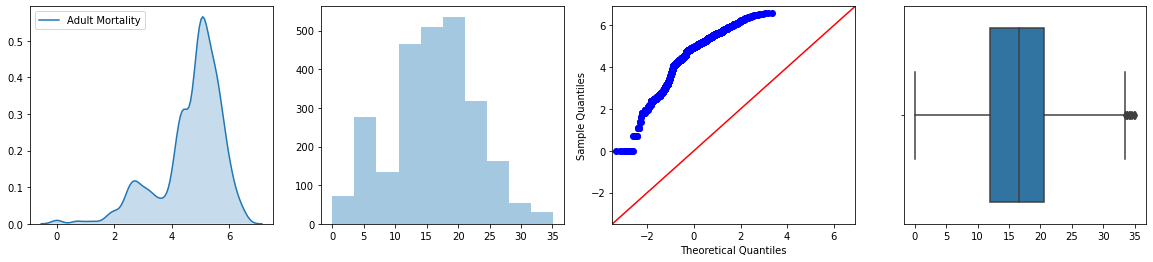

In [110]:
# Init subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

# Plots of distribution, histogram, normality test, box plot
sns.kdeplot(data=np.log(df['Adult Mortality']), shade=True, ax=ax[0])
sns.distplot(fitted_data, kde=False, bins=10 , ax=ax[1])
sm.qqplot(np.log(df['Adult Mortality']), line='45', ax=ax[2])
sns.boxplot(fitted_data, data=df, ax=ax[3])

In [109]:
fitted_data, fitted_lambda = stats.boxcox(df['Adult Mortality'])
fitted_data,fitted_lambda

(array([22.15762478, 22.46691119, 22.35155984, ..., 11.97846488,
        34.25240241, 33.77947617]),
 0.41778794400966734)

### Bivariate analysis

<b>Numerical - Numerical</b>

<AxesSubplot:>

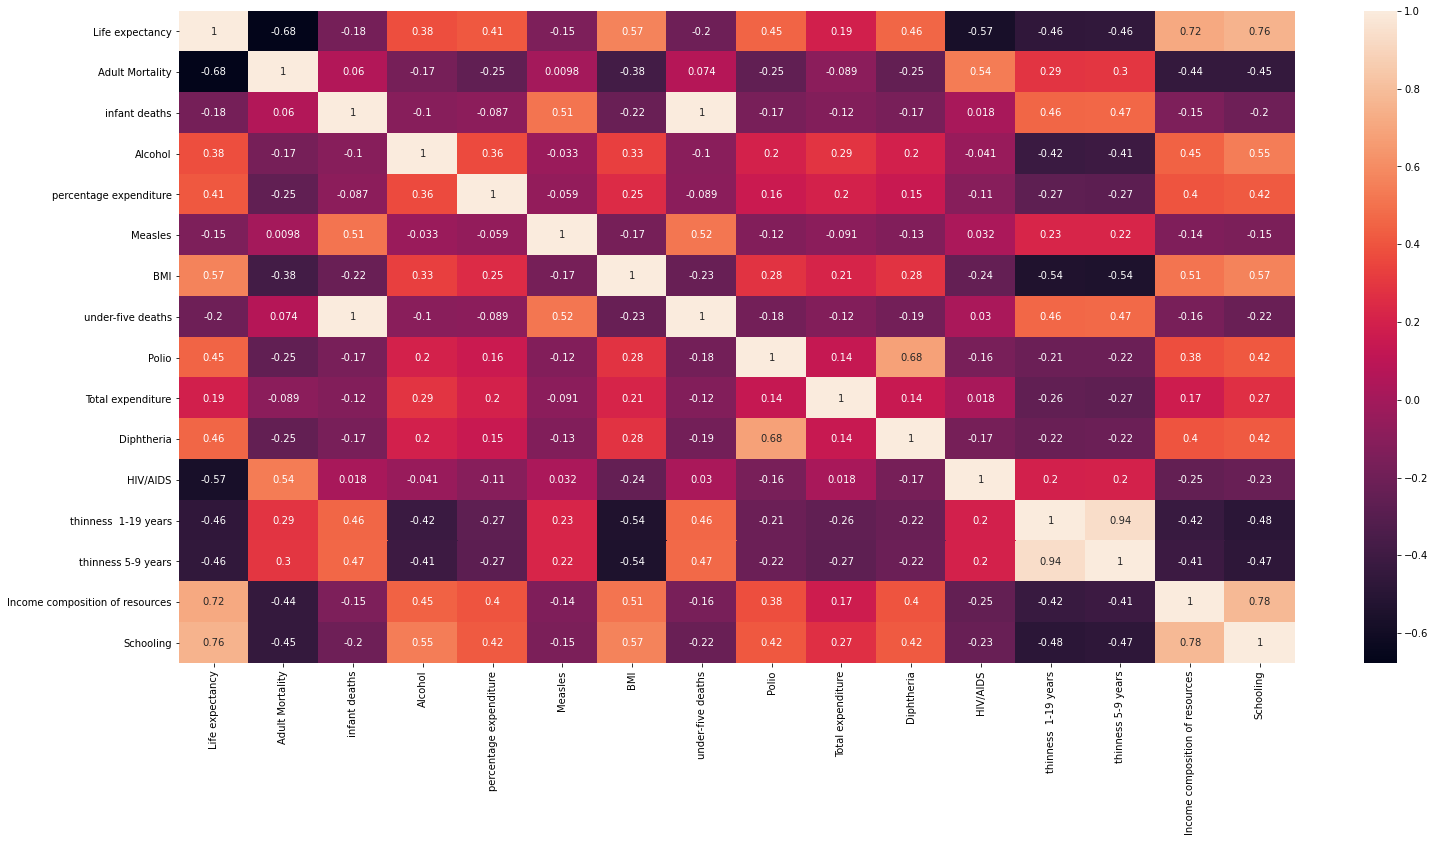

In [91]:
plt.figure(figsize=(25,12))
sns.heatmap(df[num_cols].corr(), annot=True)

In [92]:
len(num_cols)

16

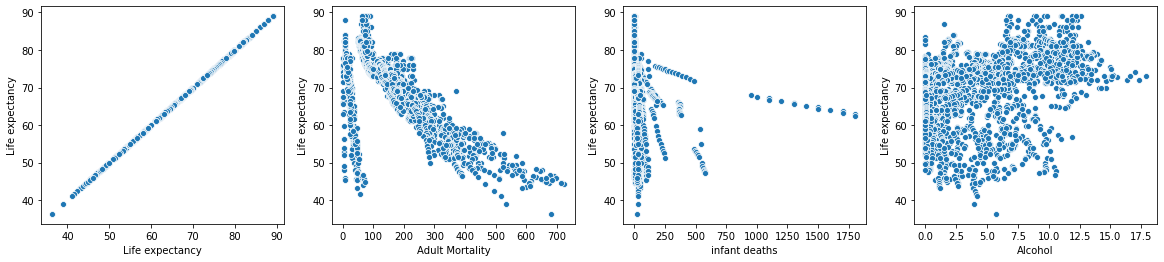

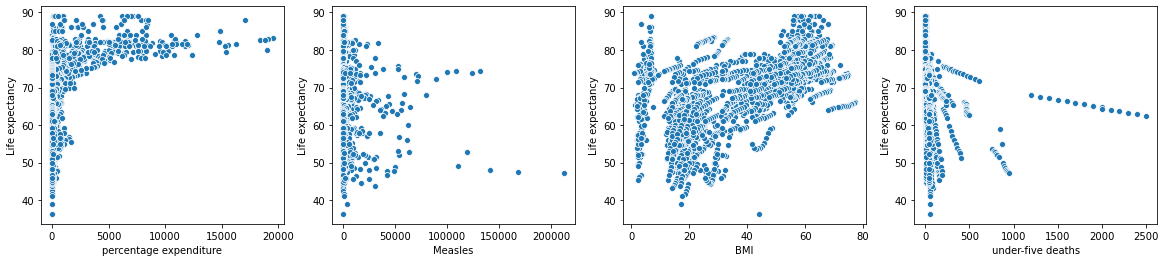

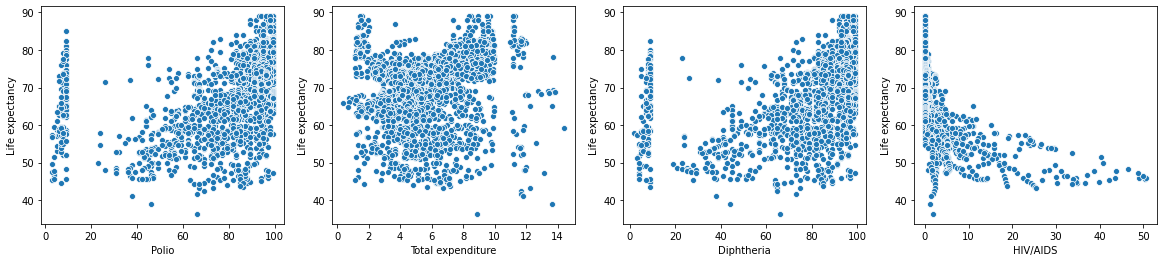

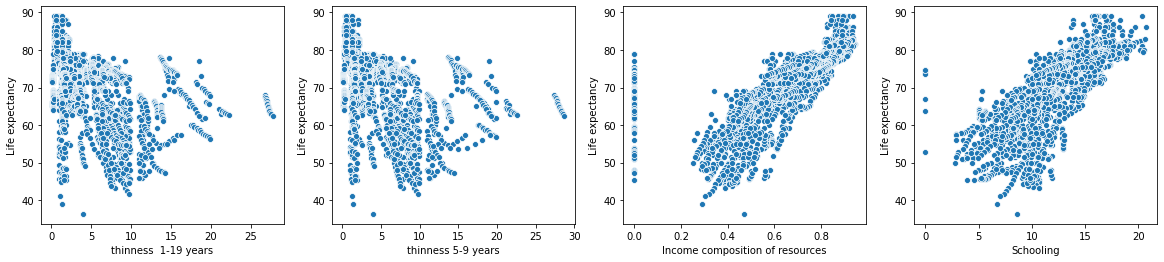

In [93]:
# Scatter plots
for n in range(0, len(num_cols), 4):
    fig, ax = plt.subplots(1, len(num_cols[n:n+4]), figsize=(20,4))
    for index, cols in enumerate(num_cols[n:n+4]):
        sns.scatterplot(x=cols, y=tar_col, data=df, ax=ax[index])

Life expectancy is having good corelation with the following variables, also it is better to understand causation. Again, in majority of the place 0 is causing noise.

<br>
<li>Schooling</li>
<li>Income composition of resources </li>
<li>thinness  1-19 years (-ve)</li>
<li>GDP</li>
<li>HIV/AIDS (-ve)</li>
<li>Diphtheria</li>
<li>Polio</li>
<li>BMI</li>
<li>Alcohol</li>
<li>percentage expenditure</li>
<li>Adult Mortality(-ve)</li>

<b> Categorical - Numerical </b>

<AxesSubplot:xlabel='Status', ylabel='Life expectancy'>

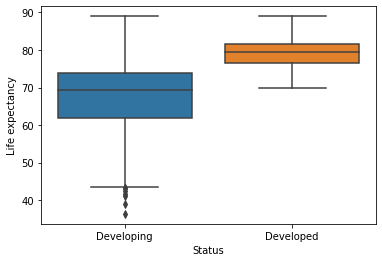

In [94]:
sns.boxplot(x='Status', y=tar_col, data=df)
# sns.swarmplot(x='Status', y=tar_col, data=df, color=".25")

Developing countries has less life expectancy compared to the developed countries.

### Label Encoder

In [95]:
# Initiate and fit the data
le = LabelEncoder()
le.fit(df['Status'])

# Transform categories to numerical values
df['Status_encoded'] = le.transform(df['Status'])
df.drop(['Status'], axis=1, inplace=True)

In [96]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_encoded
0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,1
1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,1
2,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,1
3,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,1
4,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,1


<b> Store data locally <b>

In [97]:
with open('df_processed.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('source.pickle', 'rb') as handle:
#     source = pickle.load(handle)